In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import datetime

In [2]:
df = pd.read_csv('desafio_priceav.csv')
df1 = pd.read_csv('desafio_details.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354520 entries, 0 to 354519
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         354520 non-null  int64  
 1   Unnamed: 0.1       354520 non-null  int64  
 2   airbnb_listing_id  354520 non-null  int64  
 3   booked_on          354520 non-null  object 
 4   date               354520 non-null  object 
 5   price_string       354520 non-null  float64
 6   occupied           354520 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 18.9+ MB


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4691 entries, 0 to 4690
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           4691 non-null   int64  
 1   airbnb_listing_id    4691 non-null   int64  
 2   suburb               4691 non-null   object 
 3   ad_name              4691 non-null   object 
 4   number_of_bedrooms   4508 non-null   float64
 5   number_of_bathrooms  4690 non-null   float64
 6   star_rating          2570 non-null   float64
 7   is_superhost         4691 non-null   bool   
 8   number_of_reviews    4684 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(2)
memory usage: 297.9+ KB


In [5]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
df1 = df1.drop(['Unnamed: 0'], axis=1)

In [6]:
#Unindo as tabelas, para criar um unico data frame e unificar as informações
complete_df = df.merge(df1, how='left', on='airbnb_listing_id', validate='m:1')

In [7]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354520 entries, 0 to 354519
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   airbnb_listing_id    354520 non-null  int64  
 1   booked_on            354520 non-null  object 
 2   date                 354520 non-null  object 
 3   price_string         354520 non-null  float64
 4   occupied             354520 non-null  int64  
 5   suburb               354520 non-null  object 
 6   ad_name              354520 non-null  object 
 7   number_of_bedrooms   338908 non-null  float64
 8   number_of_bathrooms  354446 non-null  float64
 9   star_rating          217529 non-null  float64
 10  is_superhost         354520 non-null  bool   
 11  number_of_reviews    354093 non-null  float64
dtypes: bool(1), float64(5), int64(2), object(4)
memory usage: 32.8+ MB


In [8]:
complete_df.isna().sum()

airbnb_listing_id           0
booked_on                   0
date                        0
price_string                0
occupied                    0
suburb                      0
ad_name                     0
number_of_bedrooms      15612
number_of_bathrooms        74
star_rating            136991
is_superhost                0
number_of_reviews         427
dtype: int64

Após realizar o merge, a quantidade de valores Nan aumentou bastante.

In [9]:
print(complete_df["airbnb_listing_id"].nunique())
print(complete_df.shape)

3347
(354520, 12)


A coluna de identificador de anuncios, possui valores repetidos, o que leva os valores Nan a se repetirem também

In [10]:
complete_df.head(2)

,airbnb_listing_id,booked_on,date,price_string,occupied,suburb,ad_name,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews
0,40201349,blank,2020-11-15,250.0,0,Ingleses,Excelente apartamento de dois dormitórios.,2.0,2.0,NaN,False,0.0
1,40201349,blank,2020-11-26,250.0,0,Ingleses,Excelente apartamento de dois dormitórios.,2.0,2.0,NaN,False,0.0


In [11]:
#Ordenando os bairros pelo identificador de anuncio
complete_df = complete_df.sort_values(by=['airbnb_listing_id', 'suburb'])

In [12]:
#Criando um dataframe, apenas com os anuncios que de fato foram alugados
new_df = complete_df[complete_df['booked_on'] != "blank"]

In [13]:
agrouped = new_df[['suburb','price_string']].groupby('suburb').mean().sort_values(by='price_string', ascending=True).reset_index()

In [14]:
agrouped

,suburb,price_string
0,Centro,211.095308
1,Lagoa da Conceição,236.531425
2,Canasvieiras,295.742377
3,Ingleses,359.064246
4,Jurerê,414.322858


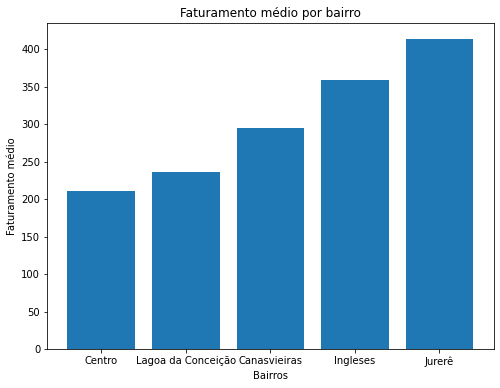

In [15]:
plt.figure(figsize=(8,6))
plt.bar(agrouped['suburb'], agrouped['price_string'])
plt.title('Faturamento médio por bairro')
plt.xlabel('Bairros')
plt.ylabel('Faturamento médio')
plt.show()

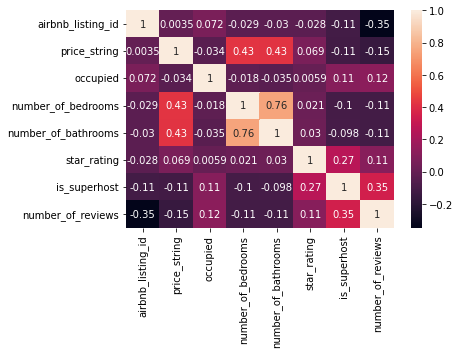

In [16]:
sns.heatmap(new_df.corr(), annot=True)

A correlçaõ entre o faturamento e as demais variáveis é muito baixa, Não tendo nenhuma variável que explique a variancia do faturamento. A Unica correlação que apresenta uma força relevante, é entre o numero de quartos, e o numero de banheiros.

In [17]:
#Criando uma coluna com o tempo de adiantamento entre agendamento e e o check-in
new_df['advance'] = 'nan'

#Convertendo os campos de object para datetime para realizar a operação
new_df['booked_on'] = pd.to_datetime(new_df['booked_on'],dayfirst=True)

new_df['date'] = pd.to_datetime(new_df['date'],dayfirst=True)

#Subitraindo as datas, para encontrar o tempo em dias
new_df['advance'] = new_df['date'] - new_df['booked_on']

#Convertendo a coluna advance de datetime para um valor numérico, para realizar operações

new_df['advance'] = new_df['advance'].dt.days

#Agrupando o tempo médio por bairo
agrouped_days = new_df[['suburb','advance']].groupby('suburb').mean().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [18]:
#Tempo médio geral
new_df['advance'].mean()

32.35171050796903

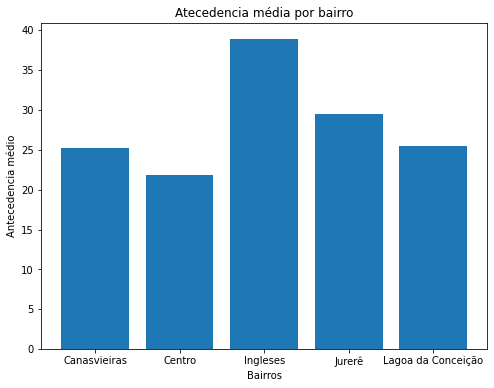

In [19]:
plt.figure(figsize=(8,6))
plt.bar(agrouped_days['suburb'], agrouped_days['advance'])
plt.title('Atecedencia média por bairro')
plt.xlabel('Bairros')
plt.ylabel('Antecedencia médio')
plt.show()

Ingleses e Jurerê são os bairros com a maior antecedencia nos agendamentos

In [20]:
#Criando uma coluna para receber o dia da semana
new_df['week_day'] = 'nan'

#Encontrando o dia da semana no dataframe
new_df['week_day'] = new_df['date'].dt.dayofweek

#Criando um dataframe para receber os dias que são feriado
new_df['is_weekend'] = 'nan'

#Selecionando os dias que são feriado
new_df['is_weekend'] = new_df['week_day'] > 4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [21]:
#Criando uma variável apenas com os fins de semana
fins_de_semana = new_df[new_df['week_day'] > 4]
dias_semana = new_df[new_df['week_day'] < 4]

In [22]:
média_fins_de_semana = fins_de_semana['advance'].mean()

média_dias_de_semana = dias_semana['advance'].mean()

média_geral = new_df['advance'].mean()

In [23]:
print(média_dias_de_semana)
print(média_fins_de_semana)
print(média_geral)

32.169335933220864
32.37059582359107
32.35171050796903


In [27]:
médias = pd.DataFrame({'Fins de semana':32.37, 'Segunda a Sexta': 32.16, 'Média Geral':32.35 }, index=[0])

In [31]:
médias

,Fins de semana,Segunda a Sexta,Média Geral
0,32.37,32.16,32.35


A Antecendencia média para locações entre dias de semana(segunga a sexta), e fins de semana, não é significante o suficiente para ser relevante. O que pode siginificar que, as locações tem demanda constante, mesmo em dias que não são fins de semana.
